In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import pandas as pd

In [2]:
df = pd.read_csv('input/training_set_TUSZ.csv')
df.head(n=10)

,filename,start_time,stop_time,seizure/non_seizure,patient,session,file,seizure_type
0,001402_s003_t001,0.0000,1264.0000,bckg,1402,s003,t001,NaN
1,001479_s001_t001,0.0000,950.0040,bckg,1479,s001,t001,NaN
2,001479_s001_t001,950.0040,1047.0178,seiz,1479,s001,t001,FNSZ
3,001479_s001_t001,1047.0178,1199.0000,bckg,1479,s001,t001,NaN
4,001413_s001_t000,0.0000,315.3400,bckg,1413,s001,t000,NaN
5,001413_s001_t000,315.3400,319.0240,seiz,1413,s001,t000,ABSZ
6,001413_s001_t000,319.0240,327.6680,bckg,1413,s001,t000,NaN
7,001413_s001_t000,327.6680,330.0320,seiz,1413,s001,t000,ABSZ
8,001413_s001_t000,330.0320,642.0160,bckg,1413,s001,t000,NaN
9,001413_s001_t000,642.0160,645.3960,seiz,1413,s001,t000,ABSZ


In [3]:
df_last = df.drop_duplicates(subset='filename', keep='last')
df_last.head(n=10)

,filename,start_time,stop_time,seizure/non_seizure,patient,session,file,seizure_type
0,001402_s003_t001,0.0000,1264.0,bckg,1402,s003,t001,NaN
3,001479_s001_t001,1047.0178,1199.0,bckg,1479,s001,t001,NaN
10,001413_s001_t000,645.3960,1206.0,bckg,1413,s001,t000,NaN
17,001413_s003_t001,619.2360,1418.0,bckg,1413,s003,t001,NaN
28,001413_s002_t001,1126.9720,1217.0,bckg,1413,s002,t001,NaN
29,006352_s001_t000,0.0000,1583.0,bckg,6352,s001,t000,NaN
34,006351_s001_t000,1579.9400,1694.0,bckg,6351,s001,t000,NaN
41,006904_s001_t001,549.1160,557.0,bckg,6904,s001,t001,NaN
54,006904_s001_t000,1575.8160,1598.0,bckg,6904,s001,t000,NaN
55,005103_s002_t001,0.0000,561.0,bckg,5103,s002,t001,NaN


In [4]:
df_last = df_last[['filename', 'stop_time', 'patient']]
df_last.head(n=10)

,filename,stop_time,patient
0,001402_s003_t001,1264.0,1402
3,001479_s001_t001,1199.0,1479
10,001413_s001_t000,1206.0,1413
17,001413_s003_t001,1418.0,1413
28,001413_s002_t001,1217.0,1413
29,006352_s001_t000,1583.0,6352
34,006351_s001_t000,1694.0,6351
41,006904_s001_t001,557.0,6904
54,006904_s001_t000,1598.0,6904
55,005103_s002_t001,561.0,5103


In [5]:
def get_random_chunk(x):
    max_len = x//12
    rand = np.arange(0,max_len, dtype=int)
    return rand

df_last['chunk']= df_last['stop_time'].apply(get_random_chunk)
# df_last['self'], df_last['comp'] = zip(*df_last['chunk'])
df_last.head()

,filename,stop_time,patient,chunk
0,001402_s003_t001,1264.0,1402,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,001479_s001_t001,1199.0,1479,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
10,001413_s001_t000,1206.0,1413,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
17,001413_s003_t001,1418.0,1413,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
28,001413_s002_t001,1217.0,1413,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [6]:
def name_modified(filename):
    pat_name, session, file = filename.split('_')
    pat_name = str(pat_name).zfill(8)
    return '{}_{}_{}'.format(pat_name, session, file)


def get_self_list(x):
    chunk12 = []
    chunk48 = []
    for idx in range(int(x['stop_time']//12) - 4):
        self12 = '{}.edf_{}.h5'.format(name_modified(x['filename']), idx)
        self48 = ['{}.edf_{}.h5'.format(name_modified(x['filename']), i) for i in range(idx, idx+4)]
        chunk12.append(self12)
        chunk48.append(self48)
    return chunk12, chunk48
df_last['chunk'] = df_last.apply(get_self_list, axis=1)
df_last['chunk12'], df_last['chunk48'] = zip(*df_last['chunk'])
df_last.head()

,filename,stop_time,patient,chunk,chunk12,chunk48
0,001402_s003_t001,1264.0,1402,"([00001402_s003_t001.edf_0.h5, 00001402_s003_t...","[00001402_s003_t001.edf_0.h5, 00001402_s003_t0...","[[00001402_s003_t001.edf_0.h5, 00001402_s003_t..."
3,001479_s001_t001,1199.0,1479,"([00001479_s001_t001.edf_0.h5, 00001479_s001_t...","[00001479_s001_t001.edf_0.h5, 00001479_s001_t0...","[[00001479_s001_t001.edf_0.h5, 00001479_s001_t..."
10,001413_s001_t000,1206.0,1413,"([00001413_s001_t000.edf_0.h5, 00001413_s001_t...","[00001413_s001_t000.edf_0.h5, 00001413_s001_t0...","[[00001413_s001_t000.edf_0.h5, 00001413_s001_t..."
17,001413_s003_t001,1418.0,1413,"([00001413_s003_t001.edf_0.h5, 00001413_s003_t...","[00001413_s003_t001.edf_0.h5, 00001413_s003_t0...","[[00001413_s003_t001.edf_0.h5, 00001413_s003_t..."
28,001413_s002_t001,1217.0,1413,"([00001413_s002_t001.edf_0.h5, 00001413_s002_t...","[00001413_s002_t001.edf_0.h5, 00001413_s002_t0...","[[00001413_s002_t001.edf_0.h5, 00001413_s002_t..."


In [7]:
df_pat = df_last.groupby('patient')[['chunk12', 'chunk48']].sum()
df_pat.head()


,chunk12,chunk48
patient,,
2,"[00000002_s002_t000.edf_0.h5, 00000002_s002_t0...","[[00000002_s002_t000.edf_0.h5, 00000002_s002_t..."
6,"[00000006_s005_t000.edf_0.h5, 00000006_s005_t0...","[[00000006_s005_t000.edf_0.h5, 00000006_s005_t..."
17,"[00000017_s003_t000.edf_0.h5, 00000017_s003_t0...","[[00000017_s003_t000.edf_0.h5, 00000017_s003_t..."
21,"[00000021_s001_t000.edf_0.h5, 00000021_s001_t0...","[[00000021_s001_t000.edf_0.h5, 00000021_s001_t..."
32,"[00000032_s002_t000.edf_0.h5, 00000032_s002_t0...","[[00000032_s002_t000.edf_0.h5, 00000032_s002_t..."


In [8]:
print(len(df_pat))
df_pat = df_pat[df_pat['chunk48'].map(lambda d: len(d)) > 0]
print(len(df_pat))


592
591


In [9]:
import random
pat_list = df_pat.index.tolist()
random.shuffle(pat_list)
train_len = int(0.9*len(pat_list))
pat_train_test = {'train': pat_list[:train_len],
                  'test': pat_list[train_len:]}

In [10]:
discrimination_df = pd.DataFrame(columns=['ch12', 'ch48', 'label'])
discrimination_list = {'train': [], 'test': []}
repeat_times = {'train': 10, 'test': 1}
for data_type in ['train', 'test']:
    for _ in range(repeat_times[data_type]):
        for pat in pat_train_test[data_type]:
            ch12_list = df_pat.loc[pat]['chunk12']
            ch48_list = df_pat.loc[pat]['chunk48']
            for ch12 in ch12_list:
                ch48 = random.sample(ch48_list, 1)[0]
                if not ch12 in ch48:
                    discrimination_list[data_type].append({'ch12': ch12, 'ch48': ch48, 'label': 0})

                rand_pat = random.sample([p for p in pat_train_test[data_type] if p != pat], 1)[0]
                ch48 = random.sample(df_pat.loc[rand_pat]['chunk48'], 1)[0]
                discrimination_list[data_type].append({'ch12': ch12, 'ch48': ch48, 'label': 1})


In [11]:
import os
from scipy import spatial
discrimination_df = pd.DataFrame(discrimination_list['train'])
root_dir = 'input/eglass_features_TUSZ/clipLen12_timeStepSize4/'


def get_similarity(x):
    with h5py.File(os.path.join(root_dir, x['ch12'] ), 'r') as in_file:
        data = in_file['clip'][()]
        avg12 = np.mean(data, axis=0).flatten()
    data48 = np.zeros((0, 19, 54))
    for ch48 in x['ch48']:
        with h5py.File(os.path.join(root_dir, ch48 ), 'r') as in_file:
            data = in_file['clip'][()]
            data48 = np.concatenate((data48, data), axis=0)
    avg48 = np.mean(data48, axis=0).flatten()
    cosine_dist = spatial.distance.cosine(avg12, avg48)
    euclidean_dist = spatial.distance.euclidean(avg12, avg48)
    return cosine_dist, euclidean_dist



sample_df = discrimination_df.sample(frac=0.01)
sample_df['distance'] = sample_df.apply(get_similarity, axis=1)
sample_df['cosine'], sample_df['euclidean'] = zip(*sample_df['distance'])
sample_df.head()

,ch12,ch48,label,distance,cosine,euclidean
3320371,00012960_s002_t006.edf_16.h5,"[00012960_s001_t001.edf_217.h5, 00012960_s001_...",0,"(0.33806261915734703, 13809.851108056586)",0.338063,13809.851108
3330084,00006546_s039_t003.edf_8.h5,"[00006546_s039_t004.edf_20.h5, 00006546_s039_t...",0,"(0.02265484188256983, 263.97490470493125)",0.022655,263.974905
1721345,00007937_s003_t000.edf_81.h5,"[00008886_s001_t000.edf_2.h5, 00008886_s001_t0...",1,"(0.7044528115697308, 6479.955357881157)",0.704453,6479.955358
3102322,00007122_s008_t005.edf_33.h5,"[00004842_s001_t001.edf_32.h5, 00004842_s001_t...",1,"(0.2849883492776538, 3033.2984011630265)",0.284988,3033.298401
3323620,00008476_s006_t006.edf_42.h5,"[00008476_s002_t002.edf_25.h5, 00008476_s002_t...",0,"(0.43746692669996257, 5529.785280714984)",0.437467,5529.785281


<AxesSubplot:title={'center':'cosine'}, xlabel='same'>

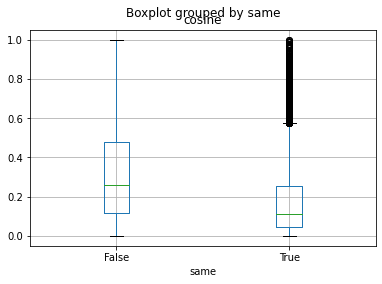

In [12]:
def same_file(x):
    ch12_name = x['ch12'].split('edf')[0]
    ch48_name = x['ch48'][0].split('edf')[0]

    return ch12_name == ch48_name

sample_df['same'] = sample_df[sample_df['label'] == 0].apply(same_file, axis=1)
sample_df[sample_df['label'] == 0].boxplot(column='cosine', by='same')

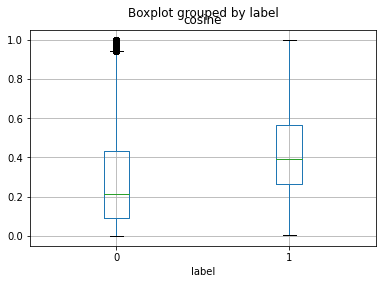

In [23]:
import matplotlib.pyplot as plt
sample_df.boxplot(column='cosine', by='label')
# sample_df.boxplot(column='euclidean', by='label', showfliers=False)
plt.savefig('output/random_cosine.png')


In [14]:
from scipy.stats import ttest_ind
cat0 = sample_df[(sample_df['label'] == 0) & (sample_df['same'] == False)]
cat1 = sample_df[(sample_df['label'] == 1) ]
ttest_ind(cat0['cosine'], cat1['cosine'])

Ttest_indResult(statistic=-40.15031189461622, pvalue=0.0)

In [15]:
print("Train : {}".format(len(discrimination_list['train'])))
print("Dev : {}".format(len(discrimination_list['test'])))

Train : 3669315
Dev : 43838


In [16]:
import pickle
pickle.dump(discrimination_list['train'], open('output/random_patient_train.pickle', 'wb'))
pickle.dump(discrimination_list['test'], open('output/random_patient_dev.pickle', 'wb'))

In [17]:
import os
with h5py.File(os.path.join('input/eglass_features_TUSZ/clipLen12_timeStepSize4/', '00000006_s006_t002.edf_49.h5' ), 'r') as in_file:
    data = in_file['clip'][()]
    print(data.shape)

(3, 19, 54)


In [18]:
np.random.seed(27)
shuffled_index = np.random.permutation(np.arange(len(df_pat)))
part1 = df_pat.iloc[shuffled_index[:len(df_pat)//2]]
part2 = df_pat.iloc[shuffled_index[len(df_pat)//2:]]
part1_len = len(part1['chunk12'].sum())
part2_len = len(part2['chunk12'].sum())

In [19]:
import os

root_dir = 'input/eglass_features_TUSZ/clipLen12_timeStepSize4/'

ch12_p1 = np.zeros((part1_len, 19*54))
ch12_p2 = np.zeros((part2_len, 19*54))

idx = 0
for pat in part1.index.tolist():
    ch12_list = df_pat.loc[pat]['chunk12']
    for ch12 in ch12_list:
        with h5py.File(os.path.join(root_dir, ch12), 'r') as in_file:
            data = in_file['clip'][()]
            avg12 = np.mean(data, axis=0).flatten()
            ch12_p1[idx, :] = avg12
            idx += 1

In [20]:
idx = 0
for pat in part2.index.tolist():
    ch12_list = df_pat.loc[pat]['chunk12']
    for ch12 in ch12_list:
        with h5py.File(os.path.join(root_dir, ch12), 'r') as in_file:
            data = in_file['clip'][()]
            avg12 = np.mean(data, axis=0).flatten()
            ch12_p2[idx, :] = avg12
            idx += 1

In [21]:

from sklearn.metrics.pairwise import cosine_similarity
similarity =  cosine_similarity(ch12_p1, ch12_p2)
similarity.shape

MemoryError: Unable to allocate 79.3 GiB for an array with shape (99293, 107233) and data type float64

In [ ]:
import pickle
data = pickle.load(open('output/random_patient_train.pickle', 'rb'))

In [ ]:
same_cnt = 0
label0 = 0
for match in data:
    if match['label'] == 0:
        label0+=1
        ch12_name = match['ch12'].split('.edf')[0]
        ch48_name = match['ch48'][0].split('.edf')[0]
        if ch12_name == ch48_name:
            same_cnt += 1
same_cnt
